<img src="https://github.com/gantian127/pymt_soilgrids/blob/master/docs/_static/logo.png?raw=true" width='600' align='center'></a>

## Introduction

[soilgrids package](https://github.com/gantian127/soilgrids) provides a set of functions that allows downloading of the global gridded soil information from [SoilGrids](https://www.isric.org/explore/soilgrids), a system for global digital soil mapping to map the spatial distribution of soil properties across the globe. soilgrids package also includes a Basic Model Interface ([BMI](https://bmi.readthedocs.io/en/latest/)). 

[pymt_soilgrids package](https://github.com/gantian127/pymt_soilgrids) uses the BMI of soilgrids to convert it into a reusable, plug-and-play data component for [PyMT](https://pymt.readthedocs.io/en/latest/?badge=latest) modeling framework. This allows the soil datasets to be easily coupled with other datasets or models that expose a BMI.

**If pymt and pymt_soilgrids are not installed, you can use the following commands:**


*To create a conda environment and install pymt*

$ conda create -n pymt -c conda-forge python=3 pymt 

$ conda activate pymt

<br>

*To install pymt_soilgrids*

$ pip install pymt_soilgrids

## Coding Example

Import SoilData class and instantiate it. A configuration file (yaml file) is required to provide the parameter settings for data download. An example configure.yaml file is provided in the same folder with this Jupyter Notebook file. For more details of the parameters specified in the config.yaml file, please check with the link [here](https://soilgrids.readthedocs.io/en/latest/?badge=latest#parameter-settings).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pymt.models import SoilData

# initiate a data component
data_comp = SoilData()
data_comp.initialize('config.yaml')

Use variable related methods to check the variable information of the soil dataset. 

In [2]:
# get variable info
var_name = data_comp.output_var_names[0]
var_unit = data_comp.var_units(var_name)
var_location = data_comp.var_location(var_name)
var_type = data_comp.var_type(var_name)
var_grid = data_comp.var_grid(var_name)

print('variable_name: {} \nvar_unit: {} \nvar_location: {} \nvar_type: {} \nvar_grid: {}'.format(
    var_name, var_unit, var_location, var_type, var_grid))

variable_name: Soil pH in H2O 
var_unit: pH*10 
var_location: node 
var_type: int16 
var_grid: 0


Use grid related methods to check the grid information of the soil dataset. 

In [3]:
# get variable grid info 
grid_type = data_comp.grid_type(var_grid)
grid_rank = data_comp.grid_ndim(var_grid) 
grid_shape = data_comp.grid_shape(var_grid)
grid_spacing = data_comp.grid_spacing(var_grid)
grid_origin = data_comp.grid_origin(var_grid)

print('grid_type: {} \ngrid_rank: {} \ngrid_shape: {} \ngrid_spacing: {} \ngrid_origin: {}'.format(
    grid_type, grid_rank, grid_shape, grid_spacing, grid_origin))

grid_type: uniform_rectilinear 
grid_rank: 2 
grid_shape: [2028 2576] 
grid_spacing: [ 250.  250.] 
grid_origin: [ 1356125. -1783875.]


Use get_value( ) method to get the soil data as a numpy array. Please note that the default behavior of pymt components is to flatten data arrays. So make a new variable that restores the dimensionality of the data.

In [4]:
# get variable data 
data = data_comp.get_value(var_name)
data_2D = data.reshape(grid_shape)

print(data.shape, data_2D.shape)

(5224128,) (2028, 2576)


Now let's make a plot of the soil data. 

Text(0.5, 1.0, 'Mean pH between 0 and 5 cm soil depth in Senegal')

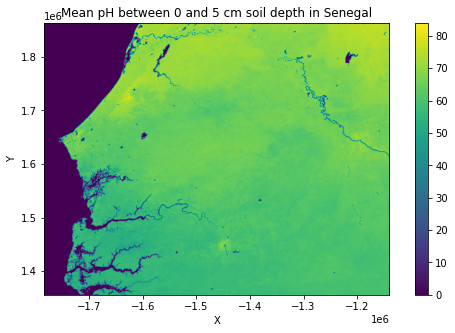

In [5]:
# get X, Y extent for plot
min_y, min_x = grid_origin
max_y = min_y + grid_spacing[0]*grid_shape[0]
max_x = min_x + grid_spacing[1]*grid_shape[1]
dy = grid_spacing[0]/2
dx = grid_spacing[1]/2
extent = [min_x - dx, max_x + dx, min_y - dy, max_y + dy]

# plot data
fig, ax = plt.subplots(1,1, figsize=(9,5))
im = ax.imshow(data_2D, extent=extent)
fig.colorbar(im)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mean pH between 0 and 5 cm soil depth in Senegal')

Complete the example by finalizing the component.

In [6]:
data_comp.finalize()